In [1]:
#%%imports
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.colors as mcolors
import numpy as np
import polars as pl
from typing import Tuple, Union

from astroLuSt.styles import plot_styles

palette, ls, markers, cmap =  plot_styles.tre_light()


# Plotting Projects 

## CV

In [3]:
df = pl.from_dicts([
    dict(task="Birth",                  start="1999-06-18", end="1999-07-18", category="academics"),
    dict(task="Solar Eclipse Austria",  start="1999-08-11", end="1999-09-11", category="academics"),
    dict(task="Gymnasium",              start="2010-09-13", end="2017-06-22", category="academics"),
    dict(task="BSc Physics",            start="2018-10-01", end="2021-11-03", category="academics"),
    dict(task="MSc Physics",            start="2021-11-03", end="2023-10-12", category="academics"),
    dict(task="MSc Computer-Science",   start="2022-10-01", end="2025-02-01", category="academics"),
    dict(task="Marshall Plan Fellow",   start="2023-02-13", end="2023-07-15", category="academics"),
    dict(task="Thesis at Villanova",    start="2023-02-13", end="2023-07-15", category="academics"),
    dict(task="PhD Melbourne",          start="2025-01-31", end="2029-01-31", category="academics"),
    dict(task="Badminton",              start="2009-10-01", end="2029-01-31", category="sports"),
    dict(task="Übungsleiter",           start="2015-01-31", end="2015-08-31", category="sports"),
    dict(task="Instructor",             start="2016-10-01", end="2017-08-31", category="sports"),
    dict(task="Hiking",                 start="2008-01-01", end="2029-01-31", category="hobbies"),
    dict(task="Magic",                  start="2017-01-01", end="2029-01-31", category="hobbies"),
    dict(task="3d-Art",                 start="2020-01-01", end="2029-01-31", category="hobbies"),
    dict(task="TASC6/KASC13 Workshop",  start="2022-07-11", end="2022-07-15", category="conferences"),
    dict(task="AAS 242 Meeting",        start="2023-06-04", end="2023-06-18", category="conferences"),
    dict(task="ÖGAA AECC 2024",         start="2024-03-08", end="2024-03-09", category="conferences"),
    dict(task="TASC8/KASC15 Workshop",  start="2024-07-15", end="2024-07-19", category="conferences"),
])


df = df.with_columns([
    pl.lit(np.arange(df.shape[0])).alias("#"),
    pl.col("start").str.strptime(pl.Datetime),
    pl.col("end").str.strptime(pl.Datetime),
])
df = df.with_columns([
    (pl.col("end")-pl.col("start")).alias("duration"),
])
display(df)

df_conferences = df.filter(pl.col("category")=="conferences")
df = df.filter(pl.col("category")!="conferences")


n = 10
rand_projects = np.array([
    np.random.choice(pl.datetime_range(df["start"].min(), df["end"].max(), "1w", eager=True), size=10),
    np.random.uniform(0, len(df), size=10),
])

print(rand_projects)


task,start,end,category,#,duration
str,datetime[μs],datetime[μs],str,i64,duration[μs]
"""Birth""",1999-06-18 00:00:00,1999-07-18 00:00:00,"""academics""",0,30d
"""Solar Eclipse …",1999-08-11 00:00:00,1999-09-11 00:00:00,"""academics""",1,31d
"""Gymnasium""",2010-09-13 00:00:00,2017-06-22 00:00:00,"""academics""",2,2474d
"""BSc Physics""",2018-10-01 00:00:00,2021-11-03 00:00:00,"""academics""",3,1129d
"""MSc Physics""",2021-11-03 00:00:00,2023-10-12 00:00:00,"""academics""",4,708d
…,…,…,…,…,…
"""3d-Art""",2020-01-01 00:00:00,2029-01-31 00:00:00,"""hobbies""",14,3318d
"""TASC6/KASC13 W…",2022-07-11 00:00:00,2022-07-15 00:00:00,"""conferences""",15,4d
"""AAS 242 Meetin…",2023-06-04 00:00:00,2023-06-18 00:00:00,"""conferences""",16,14d


[[datetime.datetime(2021, 7, 2, 0, 0)
  datetime.datetime(2028, 12, 15, 0, 0)
  datetime.datetime(2027, 7, 23, 0, 0)
  datetime.datetime(2003, 8, 15, 0, 0)
  datetime.datetime(2013, 4, 26, 0, 0)
  datetime.datetime(2010, 3, 12, 0, 0)
  datetime.datetime(2014, 8, 15, 0, 0)
  datetime.datetime(2010, 2, 5, 0, 0)
  datetime.datetime(2009, 1, 30, 0, 0)
  datetime.datetime(2014, 12, 12, 0, 0)]
 [0.5843468737732371 4.165559121440111 5.625592318465689
  14.51770476850523 9.376022430372425 12.136612891474389
  1.1086574208325222 8.018848812525562 8.920522863803797
  2.9927735984116017]]


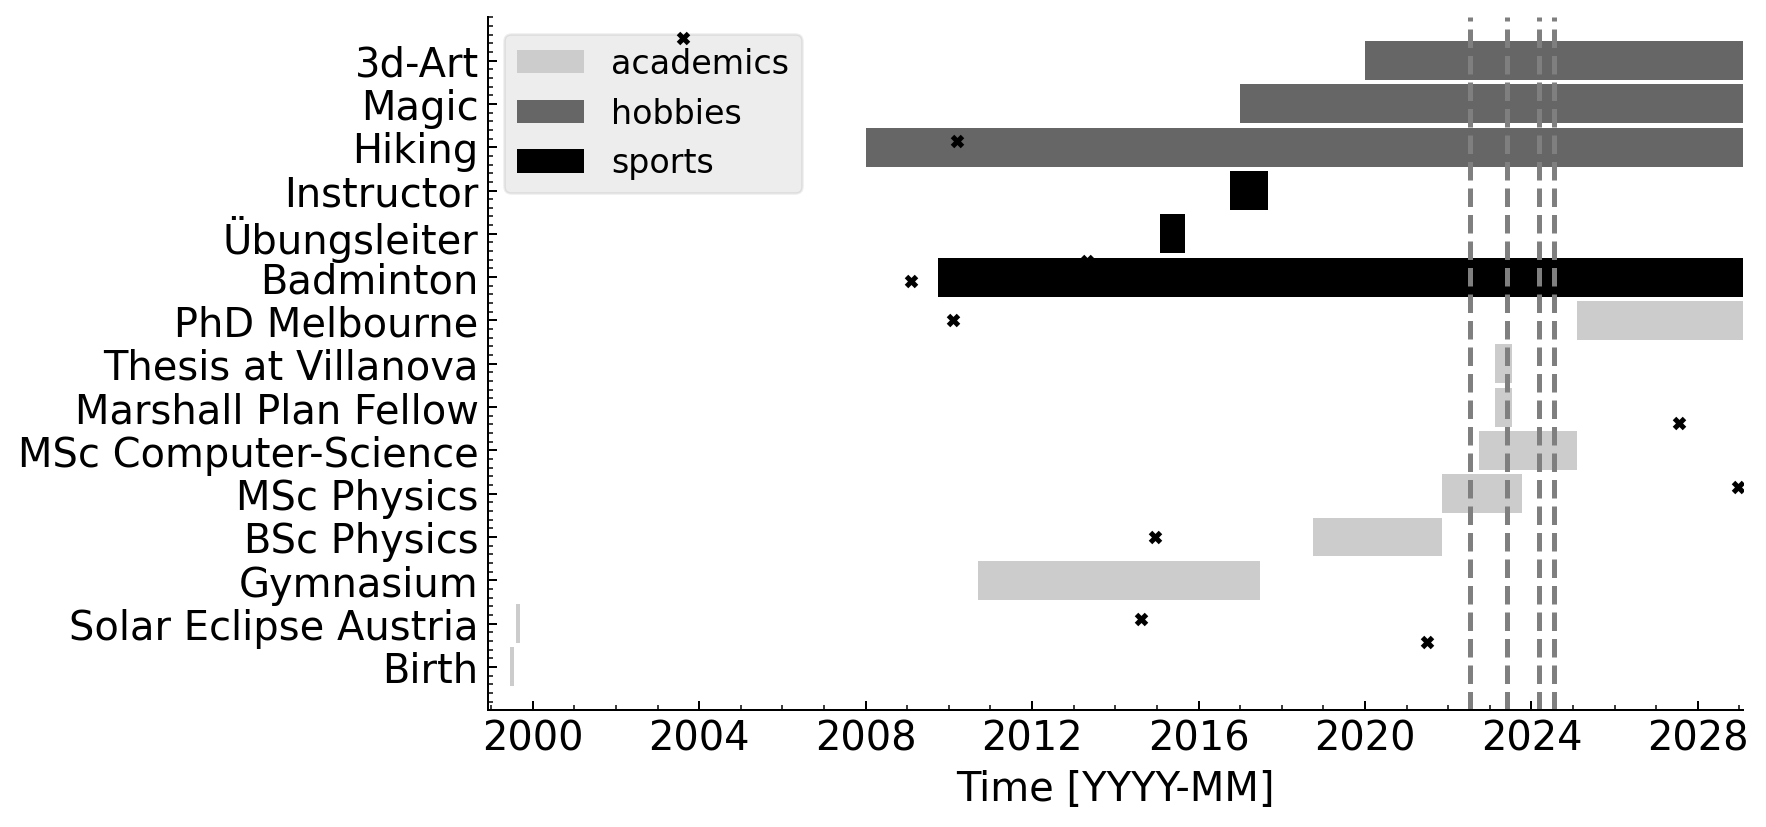

In [4]:
fig = plt.figure(figsize=(9,5), dpi=180)
ax = fig.add_subplot(111)

plot_gantt(df, cmap=cmap, ax=ax, vmin=0.2)

ax.vlines(df_conferences['start'], ymin=-1, ymax=len(df), linestyles='--', colors='tab:grey', label='conferences')
ax.scatter(*rand_projects, marker='x', color='k', label='random side-projects')
ax.scatter(np.nan, np.nan, marker='x', color='k', label='random side-projects')
ax.set_xlim(ax.get_xlim()[0]-200, df["end"].max())

plt.show()

## Pre CoC

In [8]:
df = pl.from_dicts([
    dict(task="Intuition building",                                         start="2025-01-20", end="2025-04-01", category="Dataset1"),
    dict(task="Training of existing models",                                start="2025-02-01", end="2025-05-01", category="Dataset1"),
    dict(task="Adaptation to new more Rubin LSST representative dataset",   start="2025-04-01", end="2025-08-01", category="Dataset2"),
    dict(task="Application of SNN on new dataset",                          start="2025-07-01", end="2025-09-01", category="Dataset2"),
    dict(task="Implementation of transformer-based model",                  start="2025-07-01", end="2026-01-01", category="Dataset2"),
    dict(task="Deploy my model in FINK",                                    start="2025-08-01", end="2025-08-15", category="Deployment"),
    dict(task="Analyze first predictions of my model in FINK",              start="2025-09-15", end="2025-11-01", category="Deployment"),
    dict(task="Literature Research",                                        start="2025-02-01", end="2026-01-13", category="Literature"),
][::-1])


df = df.with_columns([
    pl.lit(np.arange(df.shape[0])).alias("#"),
    pl.col("start").str.strptime(pl.Datetime),
    pl.col("end").str.strptime(pl.Datetime),
])
df = df.with_columns([
    (pl.col("end")-pl.col("start")).alias("duration"),
])
display(df)


task,start,end,category,#,duration
str,datetime[μs],datetime[μs],str,i64,duration[μs]
"""Literature Res…",2025-02-01 00:00:00,2026-01-13 00:00:00,"""Literature""",0,346d
"""Analyze first …",2025-09-15 00:00:00,2025-11-01 00:00:00,"""Deployment""",1,47d
"""Deploy my mode…",2025-08-01 00:00:00,2025-08-15 00:00:00,"""Deployment""",2,14d
"""Implementation…",2025-07-01 00:00:00,2026-01-01 00:00:00,"""Dataset2""",3,184d
"""Application of…",2025-07-01 00:00:00,2025-09-01 00:00:00,"""Dataset2""",4,62d
"""Adaptation to …",2025-04-01 00:00:00,2025-08-01 00:00:00,"""Dataset2""",5,122d
"""Training of ex…",2025-02-01 00:00:00,2025-05-01 00:00:00,"""Dataset1""",6,89d
"""Intuition buil…",2025-01-20 00:00:00,2025-04-01 00:00:00,"""Dataset1""",7,71d


/tmp/ipykernel_130446/2383862803.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left")


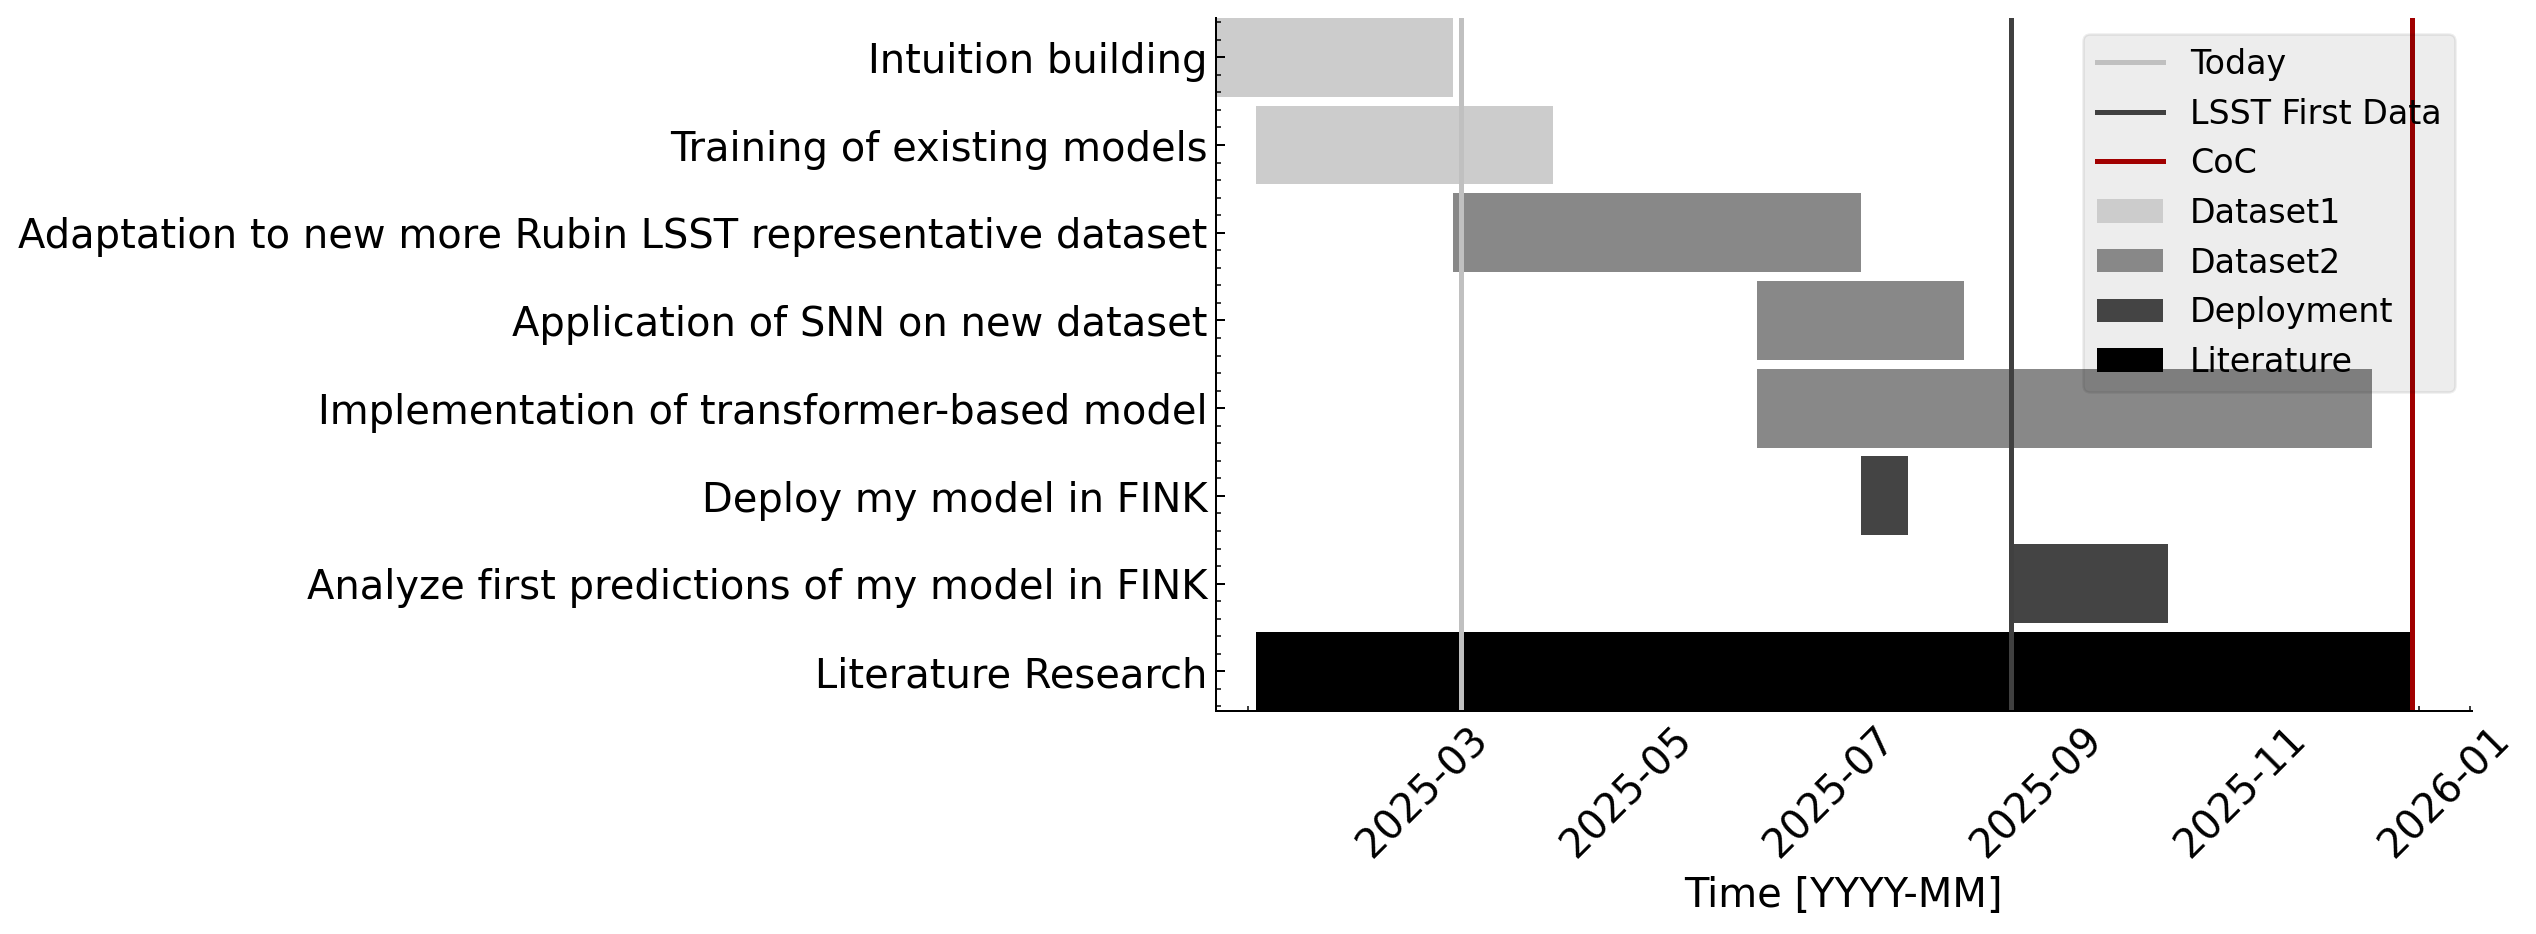

In [9]:
fig = plt.figure(figsize=(9,5), dpi=180)
ax = fig.add_subplot(111)

plot_gantt(df, cmap=cmap, ax=ax, vmin=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left")
# ax.tick_params("x", rotation=45, ha="left")

ax.axvline(datetime.now(),                              c="C3", label="Today")
ax.axvline(datetime.strptime("2025-09-15", "%Y-%m-%d"), c="C1", label="LSST First Data")
ax.axvline(datetime.strptime("2026-01-13", "%Y-%m-%d"), c="C0", label="CoC")
ax.legend()
plt.show()